#                **WATER POTABILITY PREDICTION**

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

# **Read and Analyze Data**

In [ ]:
water = pd.read_csv("/content/drive/MyDrive/water_potability.csv")

In [ ]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
water.shape

(3276, 10)

In [ ]:
water.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


<Figure size 432x288 with 0 Axes>

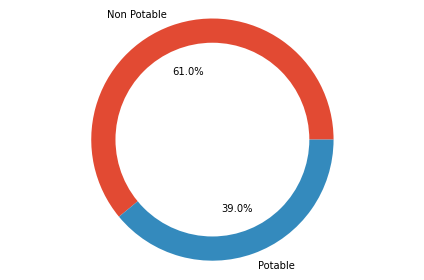

In [ ]:
plt.clf()
plt.style.use('ggplot')

fig1, ax1 = plt.subplots()
ax1.pie(water['Potability'].value_counts(), labels=['Non Potable', 'Potable'], autopct='%1.1f%%')

cc = plt.Circle((0,0),0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(cc)

ax1.axis('equal')

plt.tight_layout()
plt.show()

# **Correlation and Distribution of features**

In [ ]:
water.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


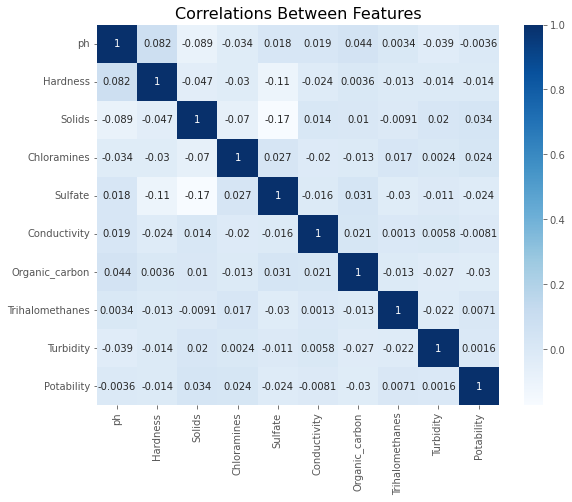

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(water.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Features", size=16)
plt.show()

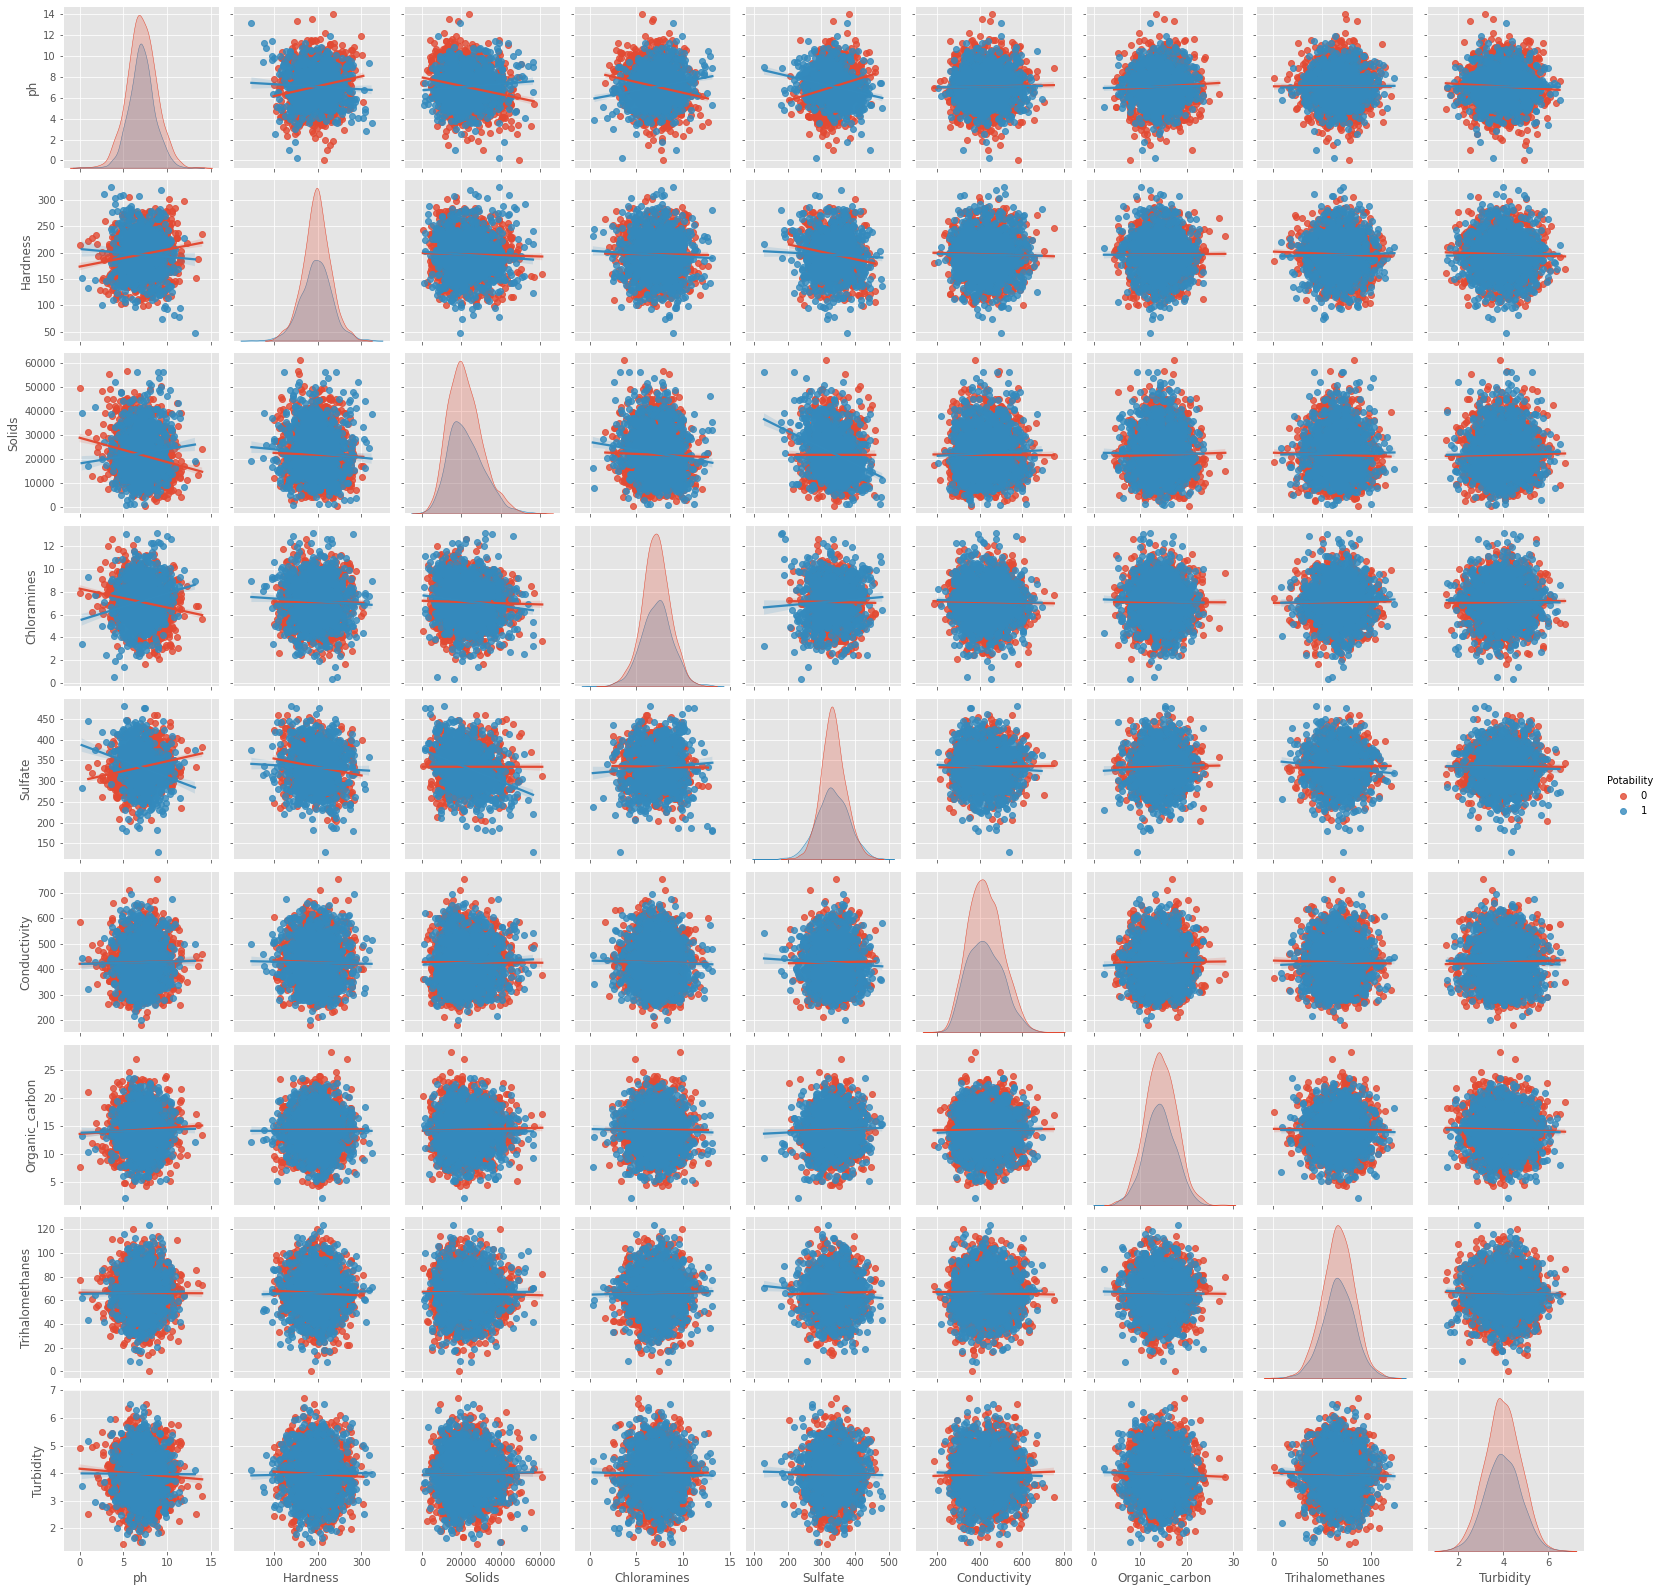

In [ ]:
sns.pairplot(water, hue='Potability', kind='reg')

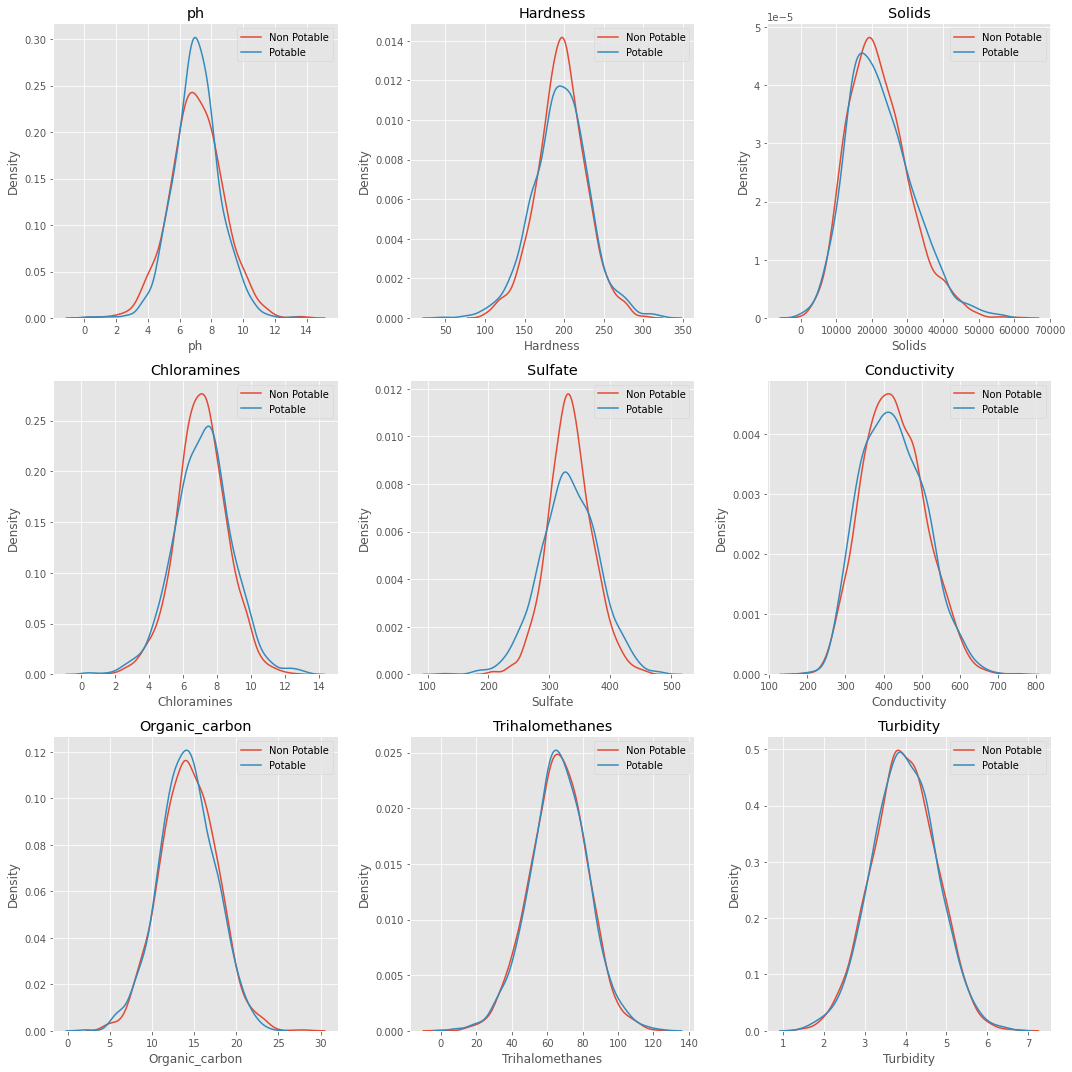

In [ ]:
n_p = water.query("Potability == 0")
p = water.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(water.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = n_p[col], label = "Non Potable")
    sns.kdeplot(x = p[col], label = "Potable")
    plt.legend()
plt.tight_layout()

# **Data Preprocessing**

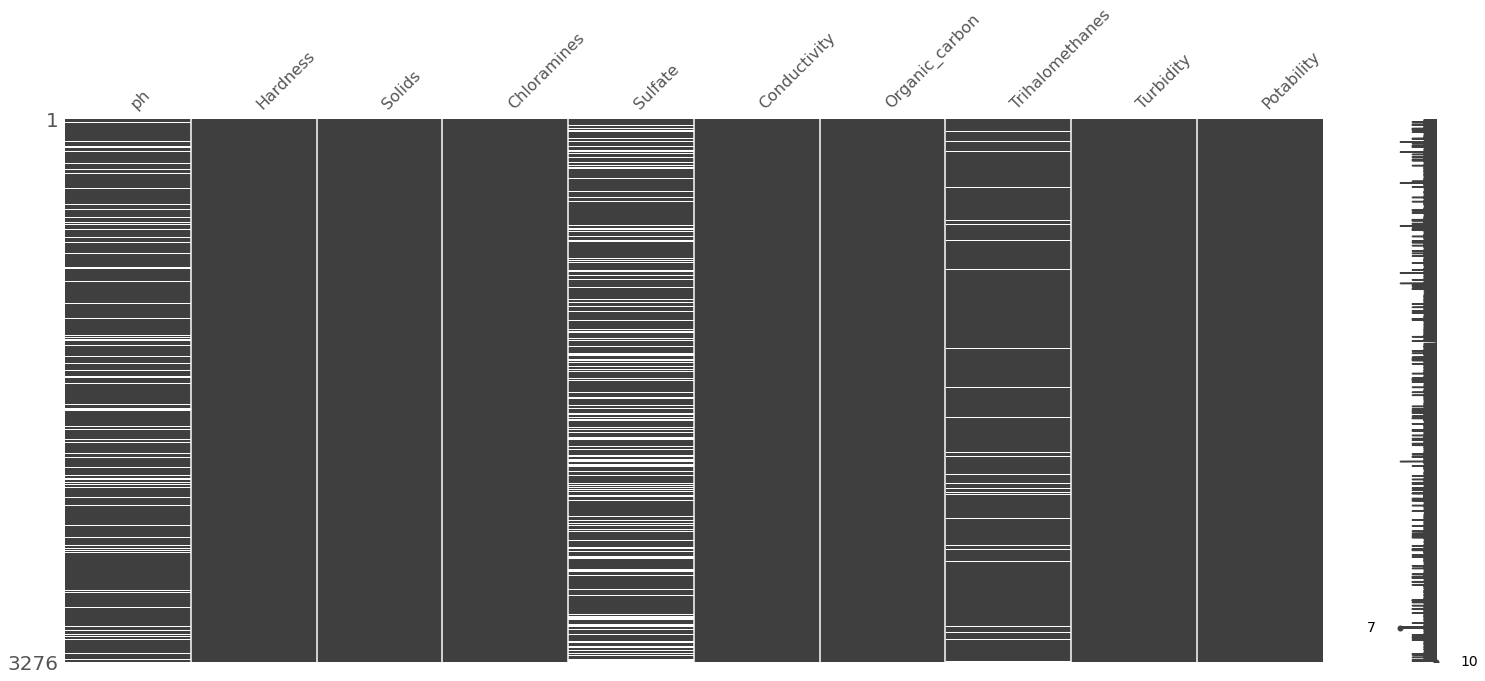

In [ ]:
#Computing Missing Null Values

msno.matrix(water)
plt.show()

In [ ]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
water["ph"].fillna(value = water["ph"].mean(), inplace = True)
water["Sulfate"].fillna(value = water["Sulfate"].mean(), inplace = True)
water["Trihalomethanes"].fillna(value = water["Trihalomethanes"].mean(), inplace = True)

In [ ]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

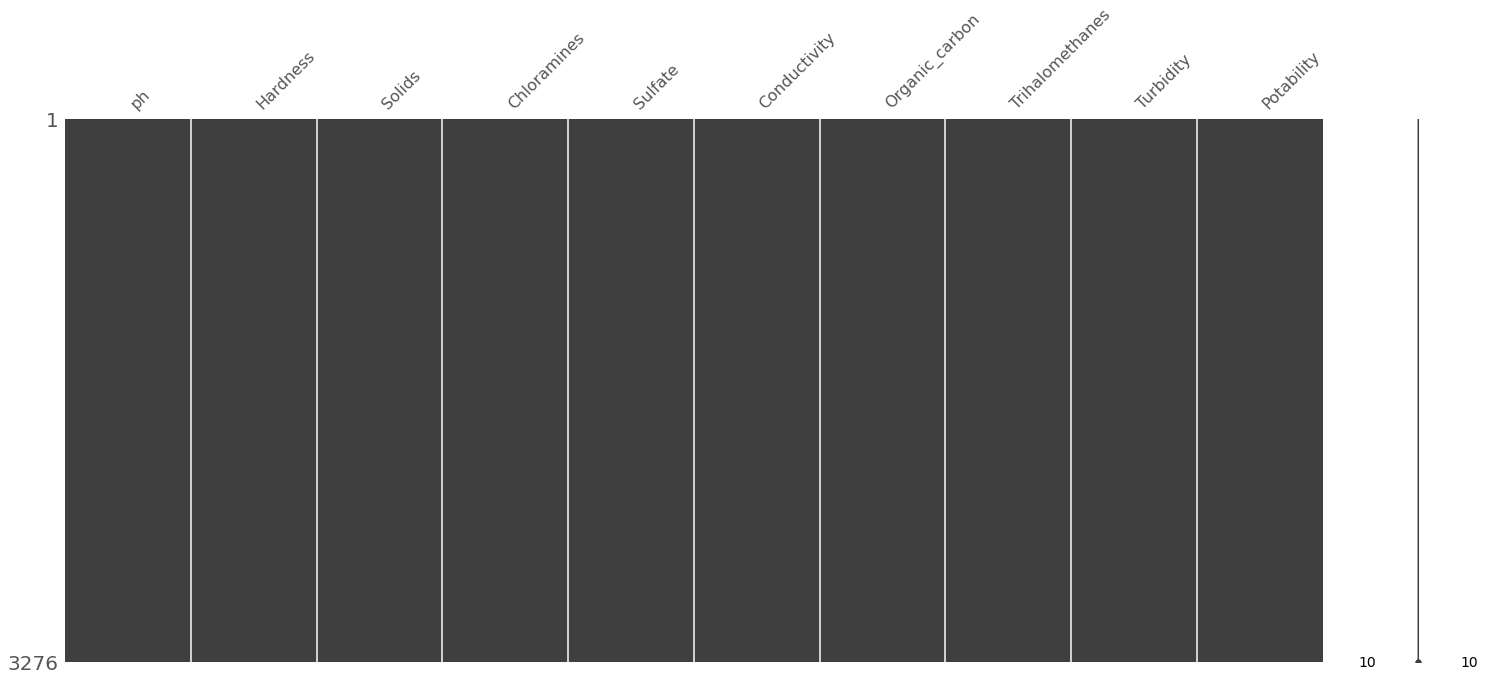

In [ ]:
msno.matrix(water)
plt.show()

In [ ]:
water.to_csv('water_potability.csv',index=False)

In [ ]:
X = water.drop('Potability', axis = 1)
y = water['Potability']


In [ ]:
#Normalization using MinMaxScaler

mm=MinMaxScaler()
X_norm=mm.fit(X)
X_norm=mm.transform(X)
X_norm[2000]

array([0.53157308, 0.5344075 , 0.56225358, 0.63728749, 0.47108461,
       0.29483037, 0.64222276, 0.64269865, 0.27314259])

In [ ]:
water.skew().sort_values(ascending=False)

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.027796
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Hardness          -0.039342
Sulfate           -0.041184
Trihalomethanes   -0.085161
dtype: float64

In [ ]:
#Train and Test Split of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [ ]:
X_train.shape

(2457, 9)

In [ ]:
X_test.shape

(819, 9)

In [ ]:
#Standardization using StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

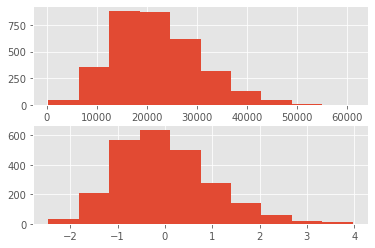

In [ ]:
fig, ax = plt.subplots(2, 1)

X.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(X_train[:, 2])
plt.show()

In [ ]:
#Balancing the data using SMOTE

counter1=Counter(y_train)
print('Oversampling - Balancing the data by SMOTE\n')
print('Before: ',counter1)
smtom=SMOTE()
X_train, y_train=smtom.fit_resample(X_train,y_train)
counter2=Counter(y_train)
print('After: ',counter2)



Oversampling - Balancing the data by SMOTE

Before:  Counter({0: 1496, 1: 961})
After:  Counter({0: 1496, 1: 1496})


In [ ]:
skew_val = water.skew().sort_values(ascending=False)
skew_val

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.027796
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Hardness          -0.039342
Sulfate           -0.041184
Trihalomethanes   -0.085161
dtype: float64

# **Applying Cross Validation to find the best Model (GridSearchCV)**

In [ ]:
model_params = {
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'max_depth':[2,4,6]
        }
    },

    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
        }
    },
    'Logistic Regression' : {
        'model': LogisticRegression(),
        'params':{
            'C'       : np.logspace(-3,3,7),
            'solver'  : ['newton-cg', 'liblinear']}
    },
    'K-Nearest Neighbour':{
        'model': KNeighborsClassifier(metric='minkowski', p=2 ),
        'params':{
            'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
        }
    }
}

In [ ]:
scores = []


for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    results=pd.DataFrame(clf.cv_results_)

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,decision_tree,0.574191,{'max_depth': 6}
1,svm,0.693865,"{'C': 20, 'kernel': 'rbf'}"
2,random_forest,0.703902,{'n_estimators': 20}
3,Logistic Regression,0.527410,"{'C': 0.01, 'solver': 'liblinear'}"
4,K-Nearest Neighbour,0.748685,{'n_neighbors': 1}


# **Compare and contrast: Random Forest, KNN, and SVM**

In [ ]:
classifier1= RandomForestClassifier()
a=classifier1.fit(X_train, y_train)

In [ ]:
a.score(X_test,y_test)

0.6471306471306472

In [ ]:
y_pred1=a.predict(X_test)
rfc_acc = round(accuracy_score(y_test, y_pred1), 2)
rfc_acc

0.65

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       502
           1       0.56      0.44      0.49       317

    accuracy                           0.65       819
   macro avg       0.62      0.61      0.61       819
weighted avg       0.64      0.65      0.64       819



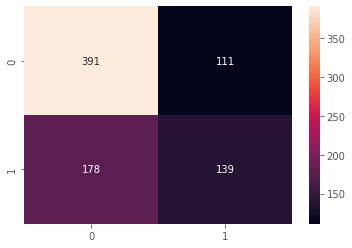

In [ ]:
ax= plt.subplot()
cf_matrix = confusion_matrix(y_test, y_pred1)
print(metrics.classification_report(y_test, y_pred1))
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);

In [ ]:
classifier2= KNeighborsClassifier()
b=classifier2.fit(X_train, y_train)

In [ ]:
b.score(X_test,y_test)

0.5885225885225885

In [ ]:
y_pred2=b.predict(X_test)
knn_acc = round(accuracy_score(y_test, y_pred2), 2)
knn_acc

0.59

              precision    recall  f1-score   support

           0       0.68      0.61      0.65       502
           1       0.47      0.55      0.51       317

    accuracy                           0.59       819
   macro avg       0.58      0.58      0.58       819
weighted avg       0.60      0.59      0.59       819



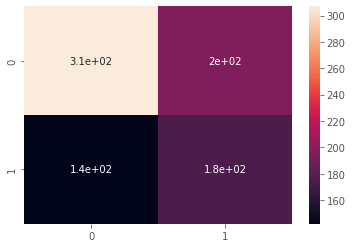

In [ ]:
ax= plt.subplot()
cf_matrix = confusion_matrix(y_test, y_pred2)
print(metrics.classification_report(y_test, y_pred2))
sns.heatmap(cf_matrix, annot=True);

In [ ]:
classifier3= svm.SVC()
c=classifier1.fit(X_train, y_train)

In [ ]:
c.score(X_test,y_test)

0.6312576312576312

In [ ]:
y_pred3=c.predict(X_test)
svm_acc = round(accuracy_score(y_test, y_pred3), 2)
svm_acc

0.63

              precision    recall  f1-score   support

           0       0.68      0.75      0.72       502
           1       0.53      0.44      0.48       317

    accuracy                           0.63       819
   macro avg       0.60      0.60      0.60       819
weighted avg       0.62      0.63      0.62       819



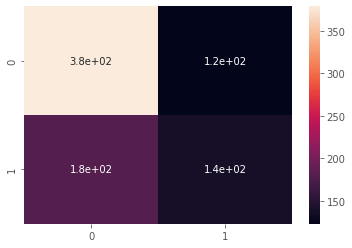

In [ ]:
ax= plt.subplot()
cf_matrix = confusion_matrix(y_test, y_pred3)
print(metrics.classification_report(y_test, y_pred3))
sns.heatmap(cf_matrix, annot=True);

In [ ]:
x = pd.DataFrame({
    'Model': ['Random Forest','KNN', 'SVM' ],
    'Accuracy': [rfc_acc*100,knn_acc*100,svm_acc*100]})
x

,Model,Accuracy
0,Random Forest,65.0
1,KNN,59.0
2,SVM,63.0


<Axes: xlabel='Model', ylabel='Accuracy'>

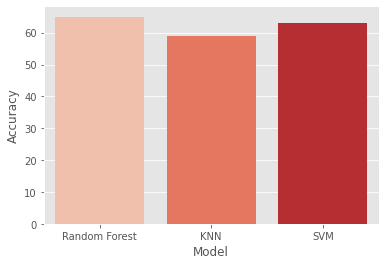

In [ ]:
sns.barplot(x='Model', y='Accuracy', data=x, palette='Reds')

In [ ]:
ML_models=[RandomForestClassifier(),svm.SVC(),KNeighborsClassifier()]

ML_columns = []
ML_comp = pd.DataFrame(columns = ML_columns)

row_index = 0
for x in ML_models:

    predicted = x.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    ML_name = x.__class__.__name__
    ML_comp.loc[row_index,'ML model used'] = ML_name
    ML_comp.loc[row_index, 'Train Accuracy'] = round(x.score(X_train, y_train), 4)
    ML_comp.loc[row_index, 'Test Accuracy'] = round(x.score(X_test, y_test), 4)
    ML_comp.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    ML_comp.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    ML_comp.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1


ML_comp

,ML model used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,RandomForestClassifier,1.0000,0.6288,0.525896,0.416404,0.589676
1,SVC,0.7497,0.6386,0.534202,0.517350,0.616245
2,KNeighborsClassifier,0.8095,0.5885,0.472973,0.552050,0.581802


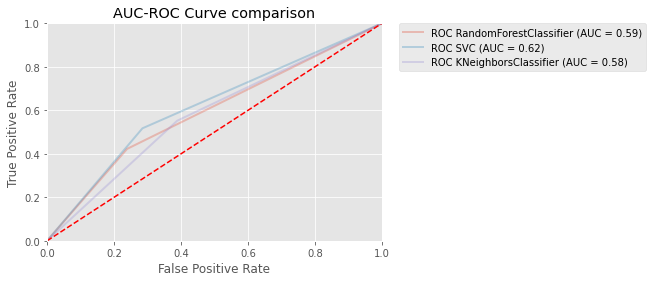

In [ ]:
index = 1
for x in ML_models:


    predicted = x.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_ml = auc(fp, tp)
    ML_name = x.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (ML_name, roc_auc_ml))

    index+=1

plt.title('AUC-ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()